# Agrupamento de imagens (dígitos)

A tarefa envolve fazer um agrupamento das imagens usando k-médias. Cada tupla (imagem) tem 64 atributos, onde cada atributo representa o brilho de um pixel na imagem 8x8. São 1797 imagens.

### Imports

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

%matplotlib inline
sns.set()

### Carrega o dataset

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

### K-Means

In [3]:
from sklearn.cluster import KMeans

In [4]:
kmeans = KMeans(n_clusters=10, random_state=70).fit(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

### Visualização das imagens formadas

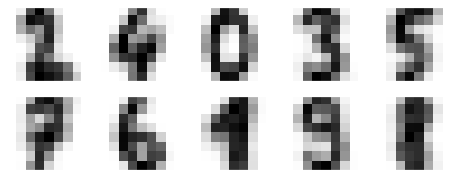

In [5]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)

for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

# Segmentação de Imagem

Sabemos que uma imagem é feita de pixels. Matematicamente um pixel é um ponto tridimensional no formato RGB. Uma dimensão é a intensidade de vermelho (Red), outra a intensidade de verde (Green) e a ultima a intensidade de azul (Blue). Neste caso, uma imagem gera uma coleção de pontos com atributos R, G e B.

### Download da imagem

In [6]:
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
      https://miro.medium.com/max/800/1*qvsGuRfX2vE8tU25d8OPxw.jpeg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25239  100 25239    0     0  30892      0 --:--:-- --:--:-- --:--:-- 30854


### Carrega a imagem

Shape da imagem: (400, 400, 3)


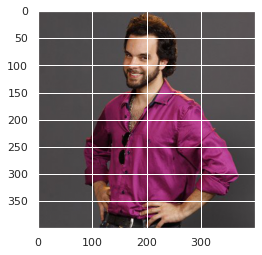

In [7]:
image = plt.imread('1*qvsGuRfX2vE8tU25d8OPxw.jpeg') / 255
print(f'Shape da imagem: {image.shape}')
plt.imshow(image)
plt.show()

### Converte imagem para matriz

In [8]:
image_n = image.reshape(image.shape[0] * image.shape[1], image.shape[2])
print(f'Shape: {image_n.shape}')
print('\n', image_n)

Shape: (160000, 3)

 [[0.29411765 0.27843137 0.28235294]
 [0.29411765 0.27843137 0.28235294]
 [0.29411765 0.27843137 0.28235294]
 ...
 [0.2627451  0.25490196 0.25882353]
 [0.2627451  0.25490196 0.25882353]
 [0.2627451  0.25490196 0.25882353]]


### KMeans

In [9]:
kmeans = KMeans(n_clusters=6, random_state=70).fit(image_n)
img = kmeans.cluster_centers_[kmeans.labels_]

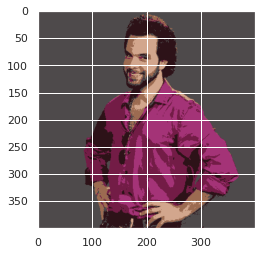

In [10]:
cluster_img = img.reshape(image.shape[0], image.shape[1], image.shape[2])
plt.imshow(cluster_img)
plt.show()